**#7**:   Modify number 6 to use **midpoint method** and generate the same five plots as in number 6.

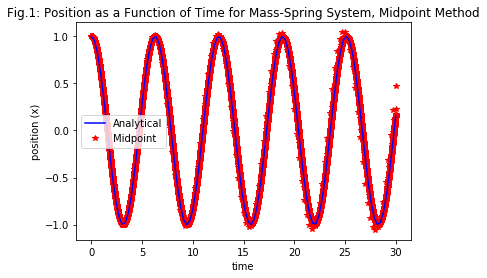

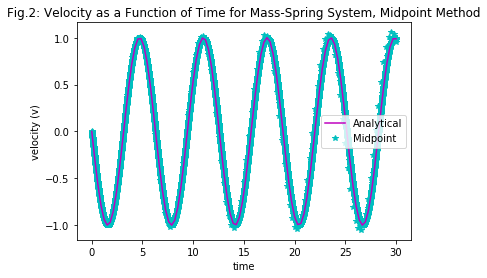

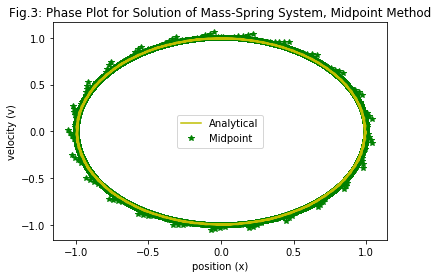

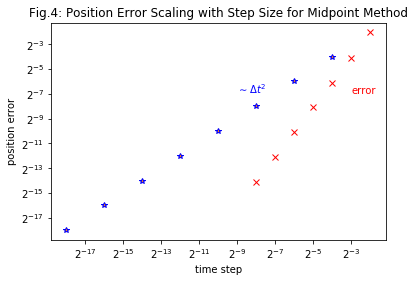

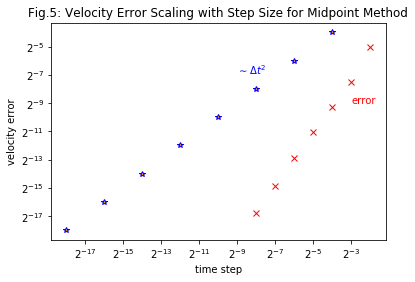

In [1]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline
 
n_soln = 8
dt0 = 0.25               #initial time step
x0 = 1                   #initial position
v0 = 0                   #initial velocity
t_final = 30              #final time to integrate to
x_f = np.zeros(n_soln)
v_f = np.zeros(n_soln)
dt_vec = np.zeros(n_soln)
dy = np.zeros(2)  #empty vector to fill for my dy values
t_all = [0]       #store initial conditions in vectors
x_all = [1]       #store initial conditions in vectors
v_all = [0]       #store initial conditions in vectors


for jj in range (0,n_soln):
    y = [x0, v0]      #initial conditions [position, velocity] as a vector
    time = 0          #time begin
    dt = dt0 / 2**jj  #time step
    dt_vec[jj] = dt
    Nsteps = round(t_final/dt) #number of time steps to take, integer
    
    for i in range (Nsteps): #number of time steps to take
        dy[0] = y[1]      #eqn for initial dx/dt
        dy[1] = -y[0]     #eqn for initial dv/dt
        yH = y + dy*dt/2  #Euler step to midpoint
        dy[0] = yH[1]        #eqn for re-eval of dx/dt
        dy[1] = -yH[0]         #eqn for re-eval of dv/dt
        y = y + dt*dy   #iterative formula to shoot across the interval
        time = time + dt #increment time accordingly
        t_all.append(time) #store 'time' in a vector for output
        x_all.append(y[0]) #store 'position' in a vector for output
        v_all.append(y[1]) #store 'velocity' in a vector for output
        
    x_f[jj] = y[0]  
    v_f[jj] = y[1]

P.figure(1)
MidpointLine1, = P.plot(t_all,x_all,'r*', label='Line 1')  #plot current point for Midpoint
P.figure(2)
MidpointLine2, = P.plot(t_all,v_all,'c*', label='Line 2')  #plot current point for Midpoint
P.figure(3)
MidpointLine3, = P.plot(x_all,v_all,'g*', label='Line 3')  #plot current point for Midpoint

          
t = np.linspace(0,t_final,100) #set up increments for analytical solution
function = np.cos(t) 
functionDeriv = -np.sin(t)
P.figure(1)
FunctionLine1, = P.plot(t,function,'b', label='Line 4')  #plot analytical solution for function
P.figure(2)
FunctionLine2, = P.plot(t,functionDeriv,'m', label='Line 5')  #plot analytical solution for derivative of func
P.figure(3)
FunctionLine3, = P.plot(function,functionDeriv,'y', label='Line 6')  #plot analytical solution for derivative of func

P.figure(1)
P.legend([FunctionLine1, MidpointLine1], ['Analytical','Midpoint']) #add legend to label plots accordingly 
P.xlabel('time') #add plot labels
P.ylabel('position (x)')
P.title("Fig.1: Position as a Function of Time for Mass-Spring System, Midpoint Method") #add plot title

P.figure(2)
P.legend([FunctionLine2, MidpointLine2], ['Analytical','Midpoint']) #add legend to label plots accordingly 
P.xlabel('time') #add plot labels
P.ylabel('velocity (v)')
P.title("Fig.2: Velocity as a Function of Time for Mass-Spring System, Midpoint Method") #add plot title

P.figure(3)
P.legend([FunctionLine3, MidpointLine3], ['Analytical','Midpoint']) #add legend to label plots accordingly 
P.xlabel('position (x)') #add plot labels
P.ylabel('velocity (v)')
P.title("Fig.3: Phase Plot for Solution of Mass-Spring System, Midpoint Method") #add plot title

P.figure(4)
y4 = abs(np.diff(x_f))
x4 = dt_vec[0:-1]
P.ylabel('position error')
P.xlabel('time step')
P.title("Fig.4: Position Error Scaling with Step Size for Midpoint Method")
P.loglog(x4, y4, basex=2, basey=2, linestyle='None', marker='x', markeredgecolor='red')
P.text(2**-3,2**-7,'error',color='r')
P.loglog((dt_vec)**2,(dt_vec)**2,basex=2, basey=2, linestyle='None', marker='*', markeredgecolor='blue')
P.text(2**-9,2**-7,'$\sim\Delta  t^{2}$',color='b')

P.figure(5)
y5 = abs(np.diff(v_f))
x5 = dt_vec[0:-1]
P.ylabel('velocity error')
P.xlabel('time step')
P.title("Fig.5: Velocity Error Scaling with Step Size for Midpoint Method")
P.loglog(x5, y5, basex=2, basey=2, linestyle='None', marker='x', markeredgecolor='red')
P.text(2**-3,2**-9,'error',color='r')
P.loglog((dt_vec)**2,(dt_vec)**2,basex=2, basey=2, linestyle='None', marker='*', markeredgecolor='blue')
P.text(2**-9,2**-7,'$\sim\Delta  t^{2}$',color='b')

P.show()  

**#8**:   Modify problem #6 to use the Runge-Kutta Method, and generate the same five plots as #6.

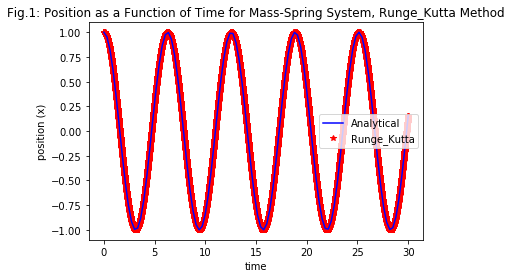

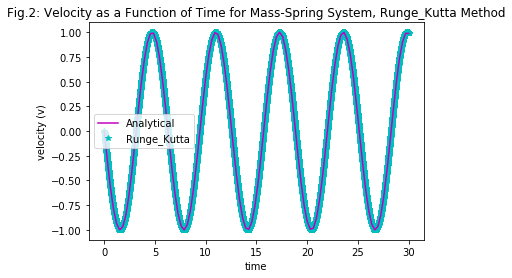

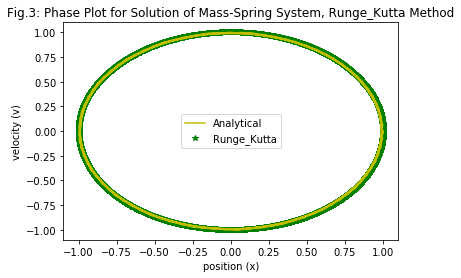

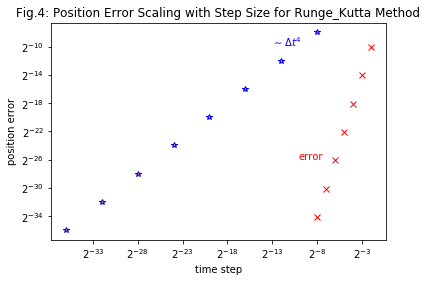

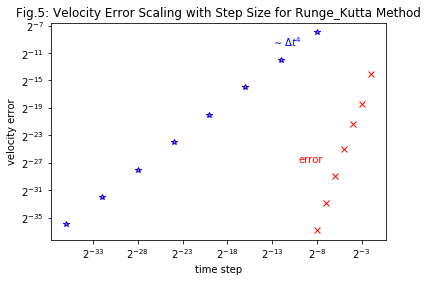

In [2]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline
 
n_soln = 8
dt0 = 0.25               #initial time step
x0 = 1                   #initial position
v0 = 0                   #initial velocity
t_final = 30              #final time to integrate to
x_f = np.zeros(n_soln)
v_f = np.zeros(n_soln)
dt_vec = np.zeros(n_soln)
dy = np.zeros(2)  #empty vector to fill for my dy values
t_all = [0]       #store initial conditions in vectors
x_all = [1]       #store initial conditions in vectors
v_all = [0]       #store initial conditions in vectors


for jj in range (0,n_soln):
    y = [x0, v0]      #initial conditions [position, velocity] as a vector
    time = 0          #time begin
    dt = dt0 / 2**jj  #time step
    dt_vec[jj] = dt
    Nsteps = round(t_final/dt) #number of time steps to take, integer
    
    for i in range (Nsteps): #number of time steps to take
        dy[0] = y[1]      #eqn for initial dx/dt (depends on y as y[1])
        dy[1] = -y[0]     #eqn for initial dv/dt (depends on y as y[0])
        k1 = dy*dt  #Euler step to Runge_Kutta 1
        dy[0] = y[1]+k1[1]/2     #eqn for re-eval of dx/dt at k1
        dy[1] = -(y[0]+k1[0]/2)    #eqn for re-eval of dv/dt at k1
        k2 = dt*dy  #Estimate 1 of slope of solution at the midpoint to Runge_Kutta 2
        dy[0] = y[1]+k2[1]/2     #eqn for re-eval of dx/dt at k2
        dy[1] = -(y[0]+k2[0]/2)    #eqn for re-eval of dv/dt at k2
        k3 = dt*dy  #Estimate 2 of slope of solution at the midpoint to Runge_Kutta 3
        dy[0] = y[1]+k3[1]     #eqn for re-eval of dx/dt at k3
        dy[1] = -(y[0]+k3[0])    #eqn for re-eval of dv/dt at k3
        k4 = dt*dy  #Estimate of slope of solution at the right endpoint to Runge_Kutta 4
        y = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)  #iterative formula to shoot across the interval
        
        time = time + dt #increment time accordingly
        t_all.append(time) #store 'time' in a vector for output
        x_all.append(y[0]) #store 'position' in a vector for output
        v_all.append(y[1]) #store 'velocity' in a vector for output
        
    x_f[jj] = y[0]  
    v_f[jj] = y[1]

P.figure(1)
Runge_KuttaLine1, = P.plot(t_all,x_all,'r*', label='Line 1')  #plot current point for Runge_Kutta
P.figure(2)
Runge_KuttaLine2, = P.plot(t_all,v_all,'c*', label='Line 2')  #plot current point for Runge_Kutta
P.figure(3)
Runge_KuttaLine3, = P.plot(x_all,v_all,'g*', label='Line 3')  #plot current point for Runge_Kutta

          
t = np.linspace(0,t_final,100) #set up increments for analytical solution
function = np.cos(t) 
functionDeriv = -np.sin(t)
P.figure(1)
FunctionLine1, = P.plot(t,function,'b', label='Line 4')  #plot analytical solution for function
P.figure(2)
FunctionLine2, = P.plot(t,functionDeriv,'m', label='Line 5')  #plot analytical solution for derivative of func
P.figure(3)
FunctionLine3, = P.plot(function,functionDeriv,'y', label='Line 6')  #plot analytical solution for derivative of func

P.figure(1)
P.legend([FunctionLine1, Runge_KuttaLine1], ['Analytical','Runge_Kutta']) #add legend to label plots accordingly 
P.xlabel('time') #add plot labels
P.ylabel('position (x)')
P.title("Fig.1: Position as a Function of Time for Mass-Spring System, Runge_Kutta Method") #add plot title

P.figure(2)
P.legend([FunctionLine2, Runge_KuttaLine2], ['Analytical','Runge_Kutta']) #add legend to label plots accordingly 
P.xlabel('time') #add plot labels
P.ylabel('velocity (v)')
P.title("Fig.2: Velocity as a Function of Time for Mass-Spring System, Runge_Kutta Method") #add plot title

P.figure(3)
P.legend([FunctionLine3, Runge_KuttaLine3], ['Analytical','Runge_Kutta']) #add legend to label plots accordingly 
P.xlabel('position (x)') #add plot labels
P.ylabel('velocity (v)')
P.title("Fig.3: Phase Plot for Solution of Mass-Spring System, Runge_Kutta Method") #add plot title

P.figure(4)
y4 = abs(np.diff(x_f))
x4 = dt_vec[0:-1]
P.ylabel('position error')
P.xlabel('time step')
P.title("Fig.4: Position Error Scaling with Step Size for Runge_Kutta Method")
P.loglog(x4, y4, basex=2, basey=2, linestyle='None', marker='x', markeredgecolor='red')
P.text(2**-10,2**-26,'error',color='r')
P.loglog((dt_vec)**4,(dt_vec)**4,basex=2, basey=2, linestyle='None', marker='*', markeredgecolor='blue')
P.text(2**-13,2**-10,'$\sim\Delta  t^{4}$',color='b')

P.figure(5)
y5 = abs(np.diff(v_f))
x5 = dt_vec[0:-1]
P.ylabel('velocity error')
P.xlabel('time step')
P.title("Fig.5: Velocity Error Scaling with Step Size for Runge_Kutta Method")
P.loglog(x5, y5, basex=2, basey=2, linestyle='None', marker='x', markeredgecolor='red')
P.text(2**-10,2**-27,'error',color='r')
P.loglog((dt_vec)**4,(dt_vec)**4,basex=2, basey=2, linestyle='None', marker='*', markeredgecolor='blue')
P.text(2**-13,2**-10,'$\sim\Delta  t^{4}$',color='b')

P.show() 

**#9**: Similarities and differences between the plots for #6,7,&8...

Figs. 1&2: There is a significant difference from #6 to #7&8, with #8 being closer to the actual function than #7...thus, #8 is a better estimate than #7 and #7 is a much better estimate than #6. All three graphs are similar in shape.

Fig. 3: There is also a significant difference from #6 to #7&8...same analysis as the first two figures. It is really neat that #8 is so much closer to the actual function (a circle). The phase plots for #6&7 show the trajectory gains error as time passes, but unless you zoom in significantly there's hardly any for #8. All three graphs are similar in shape.

Figs. 4&5: In #6, it appears that the error is pretty proportional to dt vs. dt. However, in #7, I got a better estimate after plotting dt^2 vs. dt^2, resulting in pretty proportional to the squared version (less steep in comparison). Reading graph right to left, error begins to drift. In #8, I got a better estimate after plotting dt^4 vs. dt^4, resulting in fairly proportional to the 4th power version (less steep in comparison).

**#10**: Write a script that generates a phase plot for the mass-spring system according to instructions given.

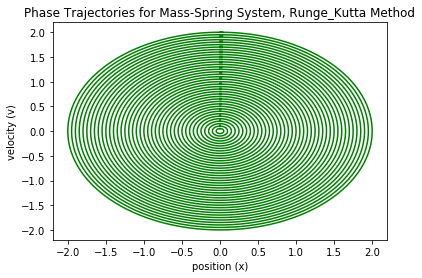

In [3]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline
 
dt = 0.05                #time step
x0 = 0                   #initial position
v0_min = 0                   #initial minimum velocity
v0_max = 2                   #initial maximum velocity
v0_step = 0.05               #initial velocity step
t_final = 2*np.pi              #final time to integrate to

v0 = np.linspace(v0_min,v0_max,int((v0_max-v0_min)/v0_step)+1)

x_f = np.zeros(len(v0))
v_f = np.zeros(len(v0))
dt_vec = np.zeros(len(v0))
dy = np.zeros(2)  #empty vector to fill for my dy values


for jj in range (1,len(v0)):
    y = [x0, v0[jj]]      #initial conditions [position, velocity vector] as a vector
    time = 0          #time begin
    Nsteps = round(t_final/dt) #number of time steps to take, integer
    
    t_all = [0]       #store initial conditions in vectors
    x_all = [x0]       #store initial conditions in vectors
    v_all = [v0[jj]]       #store initial conditions in vectors
    
    for i in range (Nsteps): #number of time steps to take
        dy[0] = y[1]      #eqn for initial dx/dt (depends on y as y[1])
        dy[1] = -y[0]     #eqn for initial dv/dt (depends on y as y[0])
        k1 = dy*dt  #Euler step to Runge_Kutta 1
        dy[0] = y[1]+k1[1]/2     #eqn for re-eval of dx/dt at k1
        dy[1] = -(y[0]+k1[0]/2)    #eqn for re-eval of dv/dt at k1
        k2 = dt*dy  #Estimate 1 of slope of solution at the midpoint to Runge_Kutta 2
        dy[0] = y[1]+k2[1]/2     #eqn for re-eval of dx/dt at k2
        dy[1] = -(y[0]+k2[0]/2)    #eqn for re-eval of dv/dt at k2
        k3 = dt*dy  #Estimate 2 of slope of solution at the midpoint to Runge_Kutta 3
        dy[0] = y[1]+k3[1]     #eqn for re-eval of dx/dt at k3
        dy[1] = -(y[0]+k3[0])    #eqn for re-eval of dv/dt at k3
        k4 = dt*dy  #Estimate of slope of solution at the right endpoint to Runge_Kutta 4
        y = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)  #iterative formula to shoot across the interval
        
        time = time + dt #increment time accordingly
        t_all.append(time) #store 'time' in a vector for output
        x_all.append(y[0]) #store 'position' in a vector for output
        v_all.append(y[1]) #store 'velocity' in a vector for output
        
    x_f[jj] = y[0]  
    v_f[jj] = y[1]

    Runge_KuttaLine3, = P.plot(x_all,v_all,'g', label='Line 3')  #plot current point for Runge_Kutta

P.xlabel('position (x)') #add plot labels
P.ylabel('velocity (v)')
P.title("Phase Trajectories for Mass-Spring System, Runge_Kutta Method") #add plot title

P.show()

**#11**: Using the program from #10, do a phase plot for the pendulum equations, but replace $ dy[1] = -sin(y[0]) $. Use the same parameter values as problem #10 but change your title and labels appropriately.

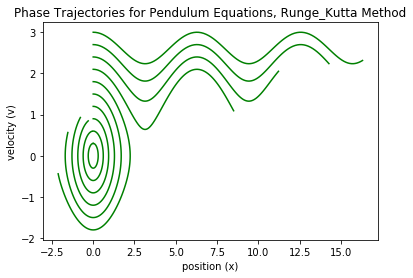

In [4]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline
 
dt = 0.05                #time step
x0 = 0                   #initial position
v0_min = 0                   #initial minimum velocity
v0_max = 3                   #initial maximum velocity
v0_step = 0.3               #initial velocity step
t_final = 2*np.pi              #final time to integrate to

v0 = np.linspace(v0_min,v0_max,int((v0_max-v0_min)/v0_step)+1)

x_f = np.zeros(len(v0))
v_f = np.zeros(len(v0))
dt_vec = np.zeros(len(v0))
dy = np.zeros(2)  #empty vector to fill for my dy values


for jj in range (1,len(v0)):
    y = [x0, v0[jj]]      #initial conditions [position, velocity vector] as a vector
    time = 0          #time begin
    Nsteps = round(t_final/dt) #number of time steps to take, integer
    
    t_all = [0]       #store initial conditions in vectors
    x_all = [x0]       #store initial conditions in vectors
    v_all = [v0[jj]]       #store initial conditions in vectors
    
    for i in range (Nsteps): #number of time steps to take
        dy[0] = y[1]      #eqn for initial dx/dt (depends on y as y[1])
        dy[1] = -np.sin(y[0])     #eqn for initial dv/dt (depends on y as y[0])
        k1 = dy*dt  #Euler step to Runge_Kutta 1
        dy[0] = y[1]+k1[1]/2     #eqn for re-eval of dx/dt at k1
        dy[1] = -np.sin(y[0]+k1[0]/2)    #eqn for re-eval of dv/dt at k1
        k2 = dt*dy  #Estimate 1 of slope of solution at the midpoint to Runge_Kutta 2
        dy[0] = y[1]+k2[1]/2     #eqn for re-eval of dx/dt at k2
        dy[1] = -np.sin(y[0]+k2[0]/2)    #eqn for re-eval of dv/dt at k2
        k3 = dt*dy  #Estimate 2 of slope of solution at the midpoint to Runge_Kutta 3
        dy[0] = y[1]+k3[1]     #eqn for re-eval of dx/dt at k3
        dy[1] = -np.sin(y[0]+k3[0])    #eqn for re-eval of dv/dt at k3
        k4 = dt*dy  #Estimate of slope of solution at the right endpoint to Runge_Kutta 4
        y = y + (1/6)*(k1 + 2*k2 + 2*k3 + k4)  #iterative formula to shoot across the interval
        
        time = time + dt #increment time accordingly
        t_all.append(time) #store 'time' in a vector for output
        x_all.append(y[0]) #store 'position' in a vector for output
        v_all.append(y[1]) #store 'velocity' in a vector for output
        
    x_f[jj] = y[0]  
    v_f[jj] = y[1]

    Runge_KuttaLine3, = P.plot(x_all,v_all,'g', label='Line 3')  #plot current point for Runge_Kutta

P.xlabel('position (x)') #add plot labels
P.ylabel('velocity (v)')
P.title("Phase Trajectories for Pendulum Equations, Runge_Kutta Method") #add plot title

P.show()

**#12**: Explain the differences between the plots in problems #10,11...

After determining that the Runge-Kutta Method is the best out of the estimation methods we've learned so far, we calculated phase plots for the phase trajectories for a Mass-Spring System vs. a Pendulum on a fixed rod. I noticed that, using a final time of 2pi, the mass-spring oscillated from resting to maximum displacement to resting to maximum displacement and finally back to resting where it began--it is the same pattern for all starting velocities except larger velocities result in larger displacements and smaller velocities result in smaller displacements. On the pendulum, since there is no friction factor, larger velocities result in basically a spinning pendulum that would never stop. Also on the pendulum, as velocities get very small, it mimicks the motion of the mass-spring system but stopping before the time period ended.